## PEI Consolidated Revenue Analysis

Using the data from [OD0032 PEI Consolidated Revenues](https://data.princeedwardisland.ca/Government-and-Economy/OD0032-PEI-Consolidated-Revenues/9yq6-iu36) for the years 2011-2019 we aim to mimic the visualizations featured on the open data hub.

In [1]:
%matplotlib inline
# Dependencies.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Data.
df = pd.read_csv('../resources/OD0032_PEI_Consolidated_Revenues.csv')
df.head(10)

,Source of Revenue,Type of Revenue,Financial Year,Value
0,Government of Canada,Government of Canada Equalization,2011/12,329022000
1,Government of Canada,Canada Health and Social Transfer,2011/12,165378000
2,Government of Canada,Government of Canada - Other,2011/12,136303000
3,Provincial,Sales Tax,2011/12,214142000
4,Provincial,Real Property Tax,2011/12,97760000
5,Provincial,Personal Income Tax,2011/12,285750000
6,Provincial,Corporate Income Tax,2011/12,42079000
7,Provincial,Other Taxes,2011/12,116683000
8,Provincial,Licenses and Permits,2011/12,24991000
9,Provincial,Fees and Services,2011/12,55601000


In [3]:
# Get list of Types of Revenue, ordered by largest to smallest.
a_df = df.set_index(['Financial Year']).drop(columns=['Source of Revenue'])

sorted_list =  a_df.loc[a_df.index=='2011/12'][['Type of Revenue', 'Value']] \
                    .sort_values('Value', ascending=False)['Type of Revenue'].tolist()
sorted_list

['Government of Canada Equalization',
 'Personal Income Tax',
 'Sales Tax',
 'Canada Health and Social Transfer',
 'Government of Canada - Other',
 'Other Taxes',
 'Real Property Tax',
 'Fees and Services',
 'Government Business Enterprises',
 'Corporate Income Tax',
 'Licenses and Permits',
 'Other income',
 'Sales',
 'Investment Income',
 'Sinking Fund Revenue']

In [4]:
# Create a grouped DataFrame.
revtype_df = df.groupby(['Financial Year', 'Type of Revenue'], axis=0).sum()
revtype_df

Value
Financial Year Type of Revenue                             
2011/12        Canada Health and Social Transfer  165378000
               Corporate Income Tax                42079000
               Fees and Services                   55601000
               Government Business Enterprises     46171000
               Government of Canada - Other       136303000
...                                                     ...
2018/19        Personal Income Tax                388080000
               Real Property Tax                  123087000
               Sales                               32926000
               Sales Tax                          311562000
               Sinking Fund Revenue                10515000

[120 rows x 1 columns]

In [5]:
# Create a DataFrame with the unstacked data for an area chart - (to 100%).
oneh_df = revtype_df.unstack().apply(lambda x: x*100/sum(x), axis=1)
# Drop the unneeded extra column level.
oneh_df.columns = oneh_df.columns.droplevel()
# Organize the columns so the highest value is first.
sorted_df = oneh_df[sorted_list]
sorted_df

Type of Revenue,Government of Canada Equalization,Personal Income Tax,Sales Tax,Canada Health and Social Transfer,Government of Canada - Other,Other Taxes,Real Property Tax,Fees and Services,Government Business Enterprises,Corporate Income Tax,Licenses and Permits,Other income,Sales,Investment Income,Sinking Fund Revenue
Financial Year,,,,,,,,,,,,,,,
2011/12,20.730771,18.004321,13.492498,10.420013,8.588077,7.351875,6.159589,3.503266,2.909108,2.651282,1.574614,1.456854,1.438581,0.948385,0.770768
2012/13,21.106459,18.809560,13.280209,10.676553,5.497166,7.302775,6.340422,3.647036,3.038842,3.267392,1.732035,1.940486,1.748691,0.908879,0.703496
2013/14,20.066933,12.904545,14.427504,10.634233,7.828291,12.202882,6.202662,3.565826,2.734777,2.763681,1.826593,1.535253,2.025194,0.802027,0.479597
2014/15,20.836081,19.098472,14.425394,10.655140,7.236207,6.169448,6.339926,3.519807,2.224316,3.037675,1.827249,1.320043,2.039535,0.746245,0.524462
2015/16,20.526387,19.817627,13.926936,10.943949,5.198933,6.287460,6.357284,3.546526,3.208380,4.161239,1.822760,1.285262,1.684988,0.720757,0.511512
2016/17,20.686658,19.043322,12.791407,11.080204,6.109596,6.337252,6.239180,3.377342,3.978620,4.350554,1.910885,1.301498,1.678167,0.622231,0.493082
2017/18,19.629203,19.189139,15.134032,10.543472,5.978469,5.904614,5.972533,3.286920,3.589436,4.936644,1.864700,1.373370,1.547846,0.561110,0.488513
2018/19,20.146958,18.669441,14.988375,10.490785,6.561485,5.731059,5.921371,3.411859,3.114460,4.502208,1.793051,2.002414,1.583978,0.576709,0.505847


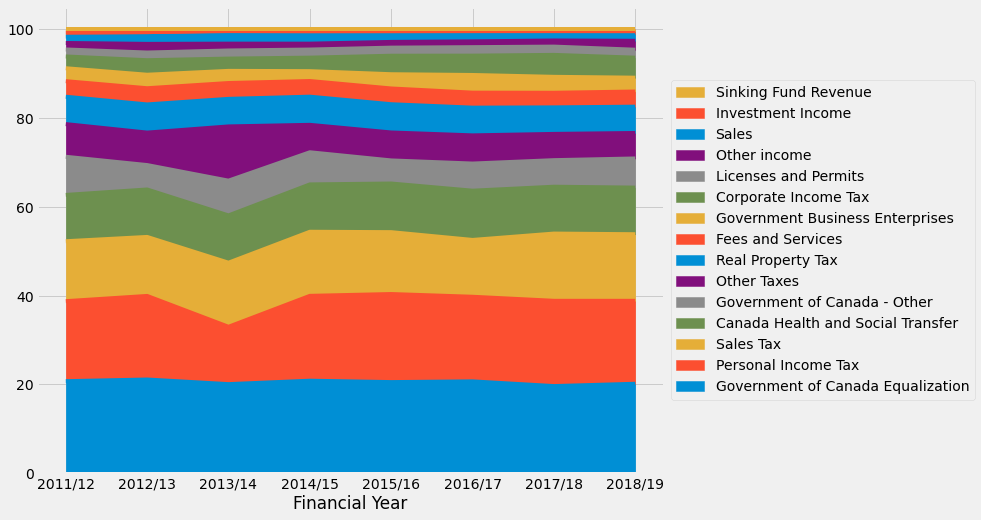

In [6]:
# Plot the area chart.
ax = sorted_df.plot.area(figsize=(10,8))

# Add a legend off to the side of the chart.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))